# "Visualising Vehicle Routing Problem Solutions"
> "Visualise paths of the multi-depot split-delivery vehicle routing problem with inventory constraints and heterogeneous fleet."
- toc: false
- badges: true
- comments: true
- categories: [Operations Research, Python]

In [13]:
#hide
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import routing problem

In [3]:
def import_instance_input(fn):
    depots = []
    customers = []

    with open(fn) as f:
        data = f.readlines()
        curr_line = 0

        # first line contains number of depots, types of vehicles and number of customers
        problem_info = data[curr_line].split()
        n_type_vehicles = int(problem_info[0])
        n_depots = int(problem_info[1])
        n_customers = int(problem_info[2])

        # process vehicle information
        curr_line = 2
        for idx in range(0, n_type_vehicles):
            curr_line += 1

        # skip empty line
        curr_line += 1

        # process depots
        for idx in range(0, n_depots):
            depot_info = data[curr_line].split()
            depots.append({
                'id': int(depot_info[0]),
                'x_coord': float(depot_info[1]),
                'y_coord': float(depot_info[2]),
                'capacity': int(depot_info[3])
            })

            curr_line += 1

        # skip empty line
        curr_line += 1

        # process customers
        for idx in range(0, n_customers):
            customer_info = data[curr_line].split()
            customers.append({
                'id': int(customer_info[0]),
                'x_coord': float(customer_info[1]),
                'y_coord': float(customer_info[2]),
                'demand': int(customer_info[3]),
                'processing_time': float(customer_info[4])
            })

            curr_line += 1
    
    return (depots, customers)

In [9]:
depots, customers = import_instance_input("../src/data/instanceA_8_input.txt")

## Import solution

In [10]:
def import_instance_output(fn):
    trips = []
    with open(fn) as f:
        data = f.readlines()

        # first line contains objective value
        obj_val = float(data[0])

        # first empty line and then all trips
        for line_idx in range(2, len(data)):
            line = data[line_idx].split()

            # if vehicle goes on trip, add customers
            customers = []
            customer_idx = 8
            while customer_idx < len(line):
                customers.append({
                    'id': line[customer_idx],
                    'load': line[customer_idx+1]
                })
                customer_idx += 2

            trips.append({
                'depot_id': int(line[0]),
                'vehicle_type': int(line[1]),
                'travel_cost': float(line[2]),
                'total_cost': float(line[3]),
                'load': int(line[4]),
                'processing_time': float(line[5]),
                'travel_time': float(line[6]),
                'total_time': float(line[7]),
                'customers': customers
            })
            
    return trips

In [14]:
trips = import_instance_output("../src/data/instanceA_8_output.txt")

## Plot solution

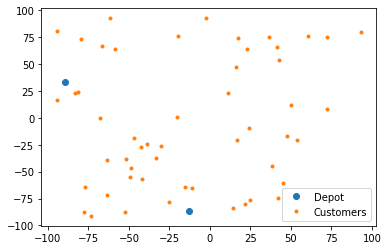

In [23]:
df_depots = pd.DataFrame(depots)
df_customers = pd.DataFrame(customers)

# plot depots
plt.plot(df_depots.x_coord.values, df_depots.y_coord.values, ls="", marker="o", label="Depot")

# plot customers
plt.plot(df_customers.x_coord.values, df_customers.y_coord.values, ls="", marker=".", label="Customers")

# plot trips



# create legend and plot
plt.legend()
plt.show()

In [24]:
trips

[{'depot_id': 0,
  'vehicle_type': 0,
  'travel_cost': 615.0,
  'total_cost': 15374.9,
  'load': 17,
  'processing_time': 0.31,
  'travel_time': 7.69,
  'total_time': 8.0,
  'customers': [{'id': '0', 'load': '2'},
   {'id': '1', 'load': '6'},
   {'id': '2', 'load': '3'},
   {'id': '3', 'load': '2'},
   {'id': '4', 'load': '1'},
   {'id': '5', 'load': '3'}]},
 {'depot_id': 0,
  'vehicle_type': 0,
  'travel_cost': 612.24,
  'total_cost': 15305.91,
  'load': 85,
  'processing_time': 0.32,
  'travel_time': 7.65,
  'total_time': 7.97,
  'customers': [{'id': '6', 'load': '18'},
   {'id': '7', 'load': '1'},
   {'id': '8', 'load': '1'},
   {'id': '9', 'load': '17'},
   {'id': '10', 'load': '16'},
   {'id': '11', 'load': '17'},
   {'id': '12', 'load': '15'}]},
 {'depot_id': 0,
  'vehicle_type': 0,
  'travel_cost': 606.31,
  'total_cost': 15157.85,
  'load': 82,
  'processing_time': 0.39,
  'travel_time': 7.58,
  'total_time': 7.97,
  'customers': [{'id': '13', 'load': '9'},
   {'id': '14', 'loa